0. Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carregando os dados

In [5]:
#Carregando o conjunto de dados "Titanic" da biblioteca seaborn
titanic_data = sns.load_dataset('titanic')

#Exibindo informações e as cinco primeiras linhas do dataset
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Pré-processamento de dados

PARTE 1

In [6]:
#Excluindo colunas desnecessárias
titanic_data.drop(columns=['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)

#Exibindo informações e as cinco primeiras linhas do dataset com as remoções
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    str     
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    str     
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), str(2)
memory usage: 57.0 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [7]:
#Determinando a quantidade de valores ausentes por coluna
(titanic_data.isnull().sum() / len(titanic_data)) * 100

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
deck        77.216611
dtype: float64

In [8]:
#Apresentando a média e mediana da coluna "age"
mean = titanic_data["age"].mean()
median = titanic_data["age"].median()
dif = (abs(mean-median)/median)*100
print(f"Diferença entre a média e mediana representa {dif} da mediana")

Diferença entre a média e mediana representa 6.0682773109243575 da mediana


In [9]:
#Trocando os valores nulos da coluna "age" pela mediana
titanic_data["age"] = titanic_data["age"].fillna(median)

#Trocando os valores nulos da coluna "embarked" pela moda
titanic_data["embarked"] = titanic_data["embarked"].fillna(titanic_data["embarked"].mode()[0])

#Removendo a coluna "deck"
titanic_data = titanic_data.drop('deck', axis=1)

In [11]:
#Conferindo a nova quantidade de valores ausentes por coluna
print((titanic_data.isnull().sum() / len(titanic_data)) * 100)

#Apresentando novo formato do dataset
titanic_data.head()

survived    0.0
pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
dtype: float64


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


PARTE 2

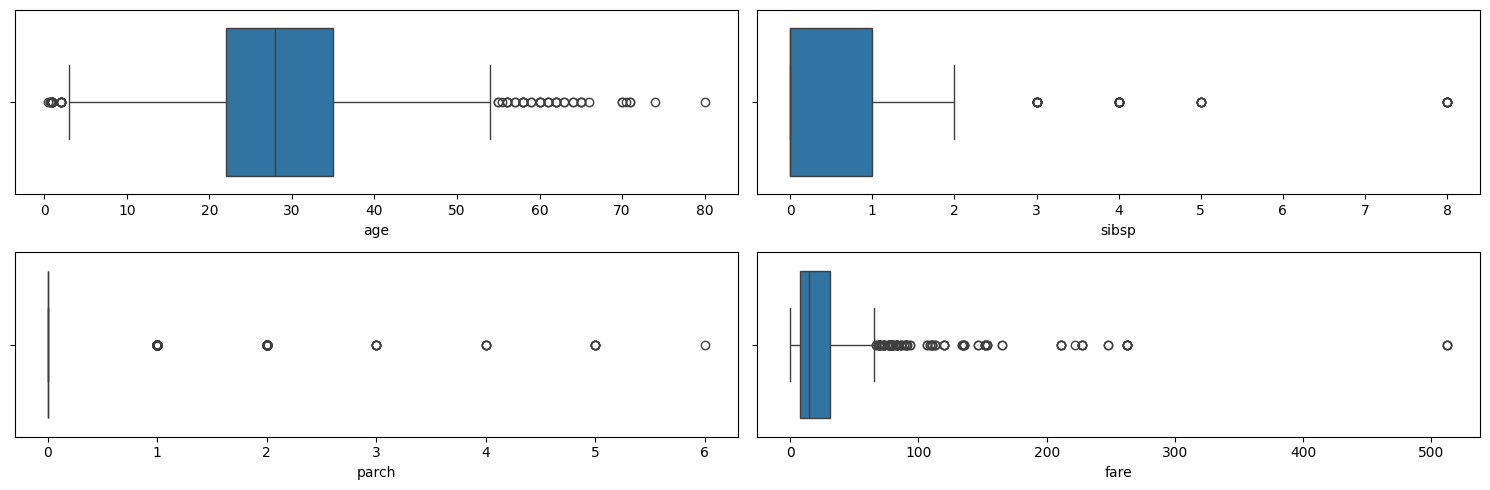

In [12]:
#Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(15, 5))

cols = ['age', 'sibsp', 'parch', 'fare']
for i in range(4):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(2, 2, i+1)
    #Plotando boxplot para analisar as colunas numéricas contínuas
    sns.boxplot(data=titanic_data, x=cols[i])

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

PARTE 3

In [16]:
#Verificando as estatísticas básicas das colunas numéricas contínuas
cols = ['age', 'sibsp', 'parch', 'fare']
resume_num = titanic_data[cols].describe().T
resume_num['cv'] = (titanic_data[cols].std()/titanic_data[cols].mean()) * 100
print(resume_num)

       count       mean        std   min      25%      50%   75%       max  \
age    891.0  29.361582  13.019697  0.42  22.0000  28.0000  35.0   80.0000   
sibsp  891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000   
parch  891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000   
fare   891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292   

               cv  
age     44.342625  
sibsp  210.846437  
parch  211.234407  
fare   154.307253  


In [ ]:
#Verificando as estatísticas básicas das colunas categóricas e numéricas discretas
cols = ['survived', 'pclass', 'sex', 'embarked']

print(f'Frequência de cada valor:\n')
for i in range(4):
    print(f'{titanic_data[cols[i]].value_counts(normalize=True)*100}\n') #normalize faz a frequência ser relativa (%)

Frequência de cada valor:

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64

